# Imports

In [1]:
import sys
sys.path.insert(1, '../')
from genesis import *

C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
universe = G10_FX
total_returns = total_returns_usd[universe]
spot_returns = spot_returns_usd[universe]
carry_returns = carry_returns_usd[universe]

# Settings

In [3]:
settings = Settings(start_date = "2000-01-01", end_date = "2016-12-31", notional = 100, implementation_lag = 1,
             asset_scaling_method="simple", asset_scaling_target=0.1, asset_scaling_width=126, rebalance_period="daily",
             sector_scaling_method="simple", sector_scaling_target=0.1, sector_scaling_width=126,
             portfolio_scaling_method="simple", portfolio_scaling_target=0.1, portfolio_scaling_width=252)

# Other Data

# Data integrity

# Signal

In [12]:
sig = spot_price_usd[universe].pct_change(20).applymap(lambda x: 1 if x < -0.01 else -1 if x > 0.01 else 0)
sig[sig==0] = np.nan
sig = sig[sig.index.weekday == 4].pipe(fill_date, True)

In [16]:
sig = spot_price_usd[universe].pipe(zscore, 50).applymap(lambda x: 1 if x < -0.5 else -1 if x > 0.5 else 0)
sig[sig==0] = np.nan
sig = sig[sig.index.weekday == 4].pipe(fill_date, True)

# Backtest Daily Rebal

In [17]:
daily_bt = Backtest(signal = sig, asset_returns = total_returns, tcost = abs(total_returns*0), settings = settings)
daily_bt.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [18]:
get_summary(daily_bt)

Returns   : -0.029613115120707977
Vol       : 0.10348771202586671
SR        : -0.286151027411894
Max DD    : -67.49

C Returns : -0.03437035710028113
C SR      : -0.3571103952295663
C Max DD  : -52.83

Hit rate  : 0.499
W | N | L : 0.5 | 0.0 | 0.5
W/L Ratio : 0.99


In [19]:
get_returns_stats(daily_bt.asset_rtn, daily_bt.wts)

,USDAUD,USDCAD,USDEUR,USDGBP,USDJPY,USDNZD,USDSEK,USDNOK,USDCHF
annualized_return,-0.250702,-0.457965,-0.628615,-0.167061,-0.571494,-0.454701,-0.241561,-0.335851,0.146637
sharpe,-0.130367,-0.238758,-0.333632,-0.086188,-0.297197,-0.240699,-0.129072,-0.177402,0.068365
dollar_sharpe,-0.141346,-0.252929,-0.344163,-0.095129,-0.296692,-0.256699,-0.138827,-0.187692,0.060139
trade_sharpe,-0.130367,-0.238758,-0.333632,-0.086188,-0.297197,-0.240699,-0.129072,-0.177402,0.068365
long_sharpe,-0.339846,-0.488497,-0.313472,-0.19789,0.0271,-0.624444,-0.286987,-0.447946,-0.28932
short_sharpe,0.101273,-0.006011,-0.355989,0.011877,-0.642196,0.280308,0.021622,0.101154,0.406669
sortino,-0.09883,-0.18141,-0.24501,-0.058829,-0.210041,-0.188086,-0.095454,-0.13427,0.057995
max_drawdown,-11.404591,-11.921535,-12.353108,-7.341988,-12.663952,-11.501251,-9.133705,-7.605768,-8.882116
max_drawdown_start,2002-02-22,2003-01-01,2002-03-28,2013-08-08,2012-02-09,2001-11-13,2002-02-26,2014-02-20,2002-03-28
max_drawdown_end,2015-09-04,2016-05-02,2015-03-13,2016-10-11,2016-12-15,2014-09-29,2010-11-04,2016-05-02,2011-08-09


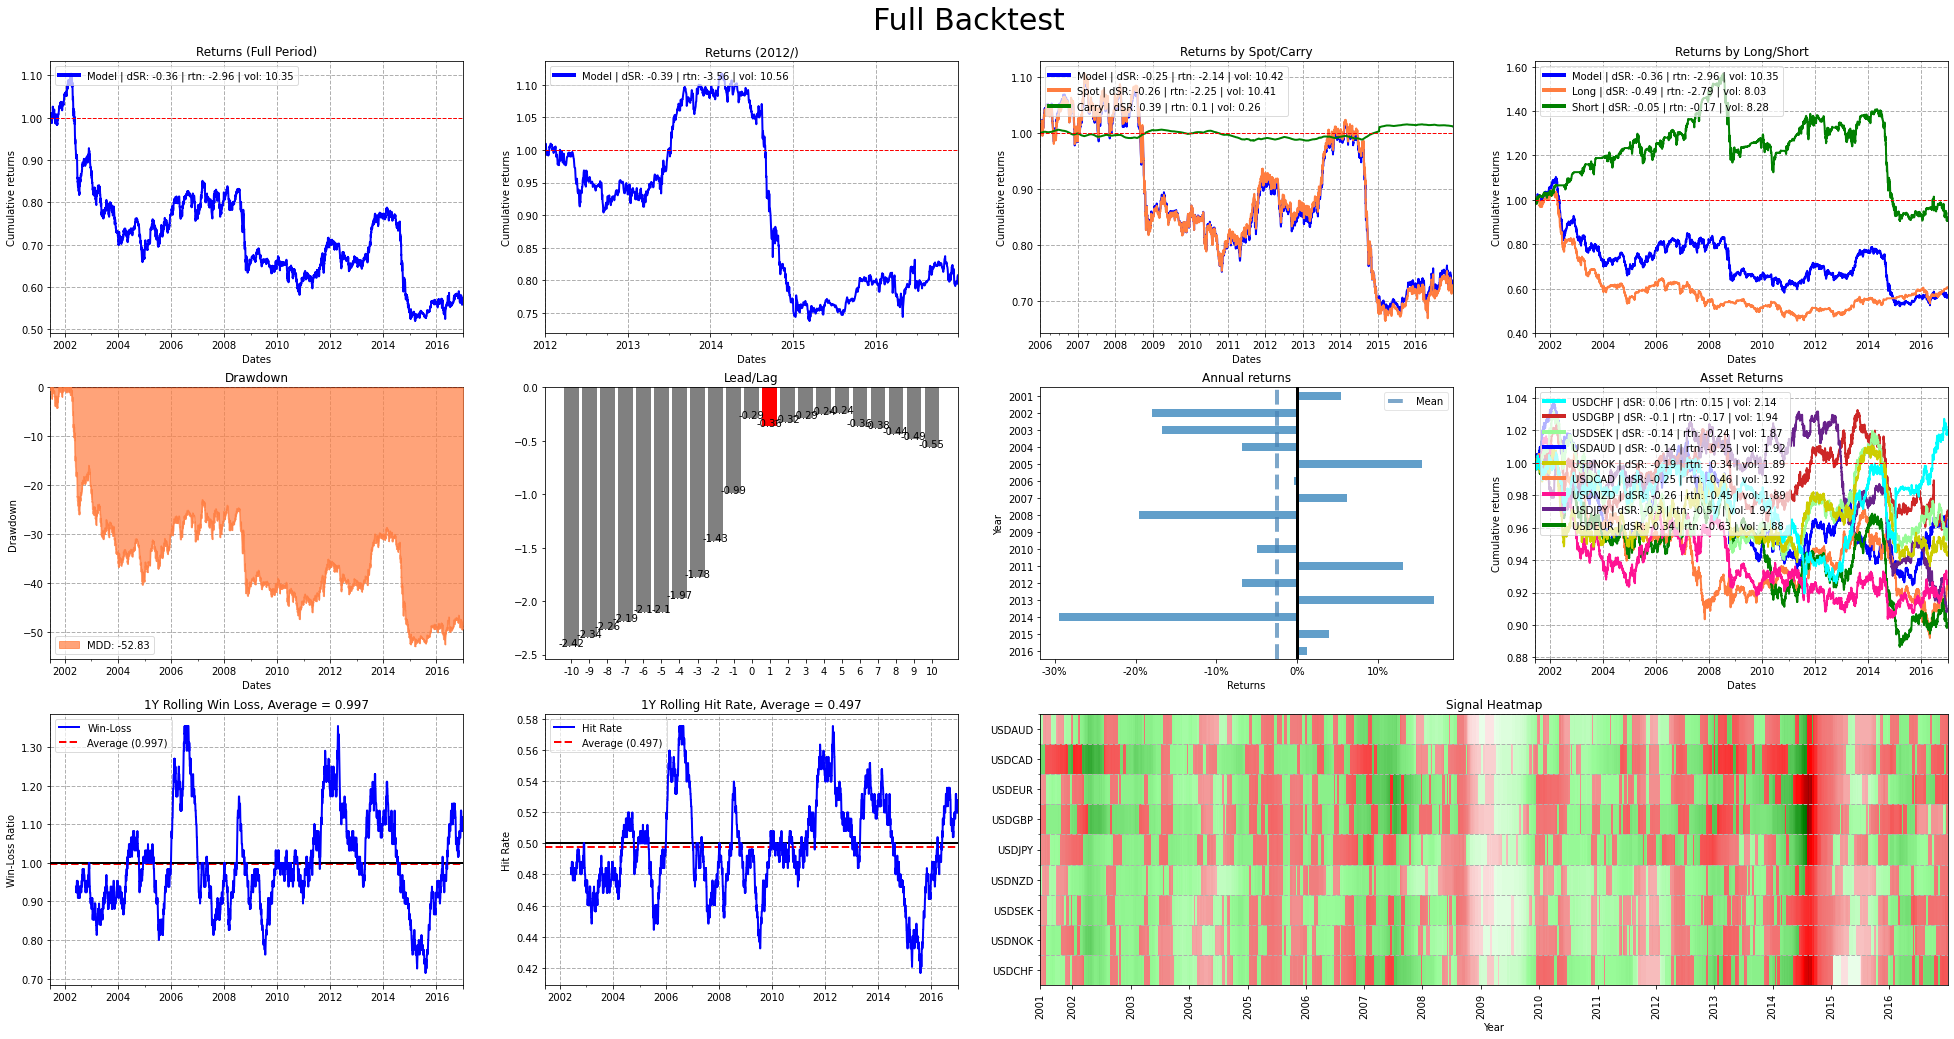

In [20]:
plot_bt(daily_bt)

# Backtest Weekly Rebal

In [52]:
weekly_bt = Backtest(signal = sig, 
             asset_returns = total_returns, 
             tcost = abs(total_returns*0), 
             settings = settings,
             settings_inject = {"rebalance_period":"friday"})
weekly_bt.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [90]:
get_summary(weekly_bt)

Returns   : -0.03672482704499821
Vol       : 0.10493475990565033
SR        : -0.3499777107034741
Max DD    : -80.0

C Returns : -0.0413614466713301
C SR      : -0.429256718922039
C Max DD  : -58.44

Hit rate  : 0.49
W | N | L : 0.49 | 0.0 | 0.51
W/L Ratio : 0.96


In [91]:
get_returns_stats(weekly_bt.asset_rtn, weekly_bt.wts)

,USDAUD,USDCAD,USDEUR,USDGBP,USDJPY,USDNZD,USDSEK,USDNOK,USDCHF
annualized_return,-0.018735,0.06127,-0.376441,-0.154148,-0.72703,-0.354022,-0.60542,-0.916616,-0.265845
sharpe,-0.006528,0.026454,-0.187958,-0.063753,-0.254959,-0.113097,-0.262187,-0.354802,-0.119994
dollar_sharpe,-0.020838,0.015404,-0.198738,-0.076274,-0.259192,-0.132895,-0.27737,-0.386769,-0.132295
trade_sharpe,-0.085497,0.244941,-0.607196,-0.460266,-0.467287,-0.395711,-0.516184,-0.847532,-0.547849
long_sharpe,-0.649603,0.450094,0.176185,-0.216286,0.667747,-0.823568,-1.082447,-1.882836,-0.30031
short_sharpe,0.396386,0.101454,-1.428819,-0.813945,-1.507311,-0.01981,-0.136346,-0.261535,-1.208156
sortino,-0.002531,0.009139,-0.045435,-0.019461,-0.095312,-0.055025,-0.095995,-0.133538,-0.035016
max_drawdown,-15.372628,-10.64086,-13.039242,-13.926724,-22.39393,-16.107386,-12.723455,-21.81203,-13.435616
max_drawdown_start,2006-04-06,2002-01-15,2003-05-15,2004-03-04,2010-06-03,2002-03-11,2001-06-18,2001-10-19,2003-12-12
max_drawdown_end,2015-01-16,2007-11-06,2012-09-14,2016-01-27,2014-12-05,2004-02-17,2012-05-31,2010-06-07,2012-07-24


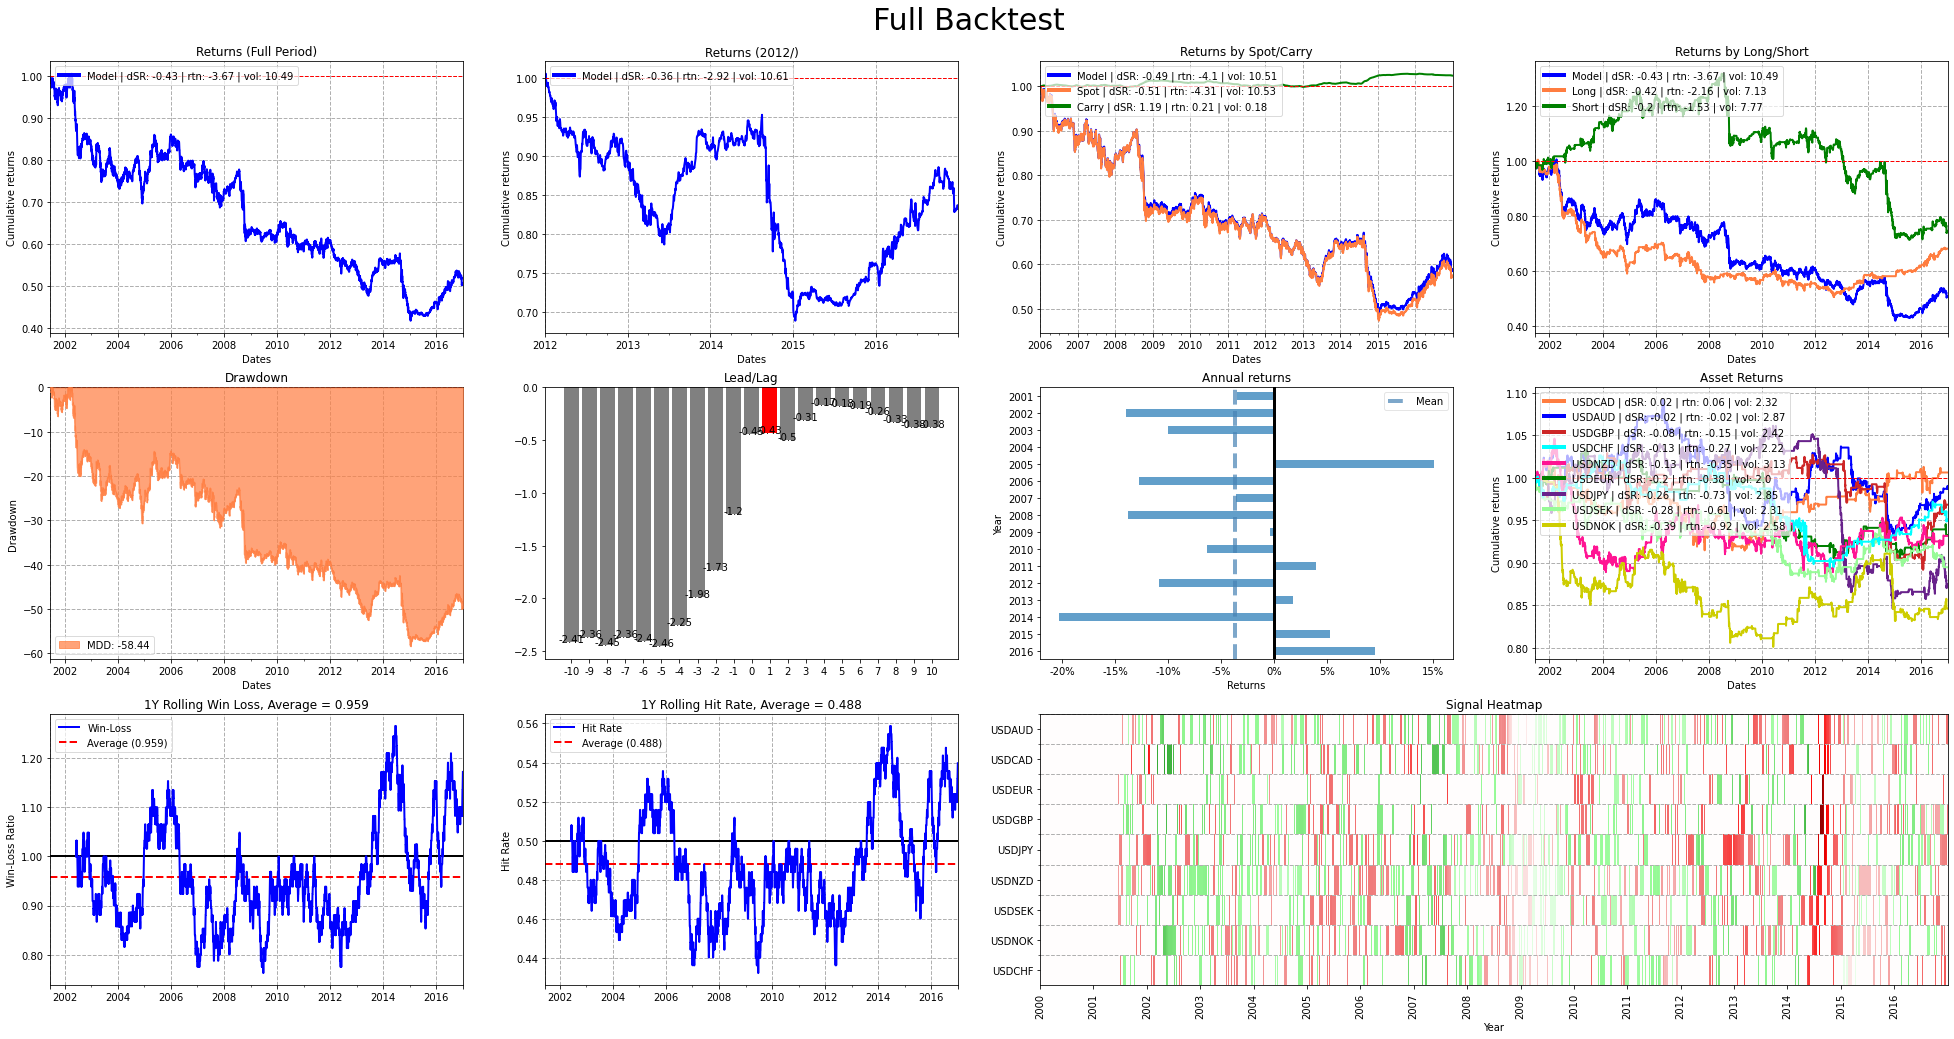

In [92]:
plot_bt(weekly_bt)

# Daily vs Weekly 

<AxesSubplot:title={'center':'Daily vs Weekly Rebal'}, xlabel='Dates', ylabel='Cumulative returns'>

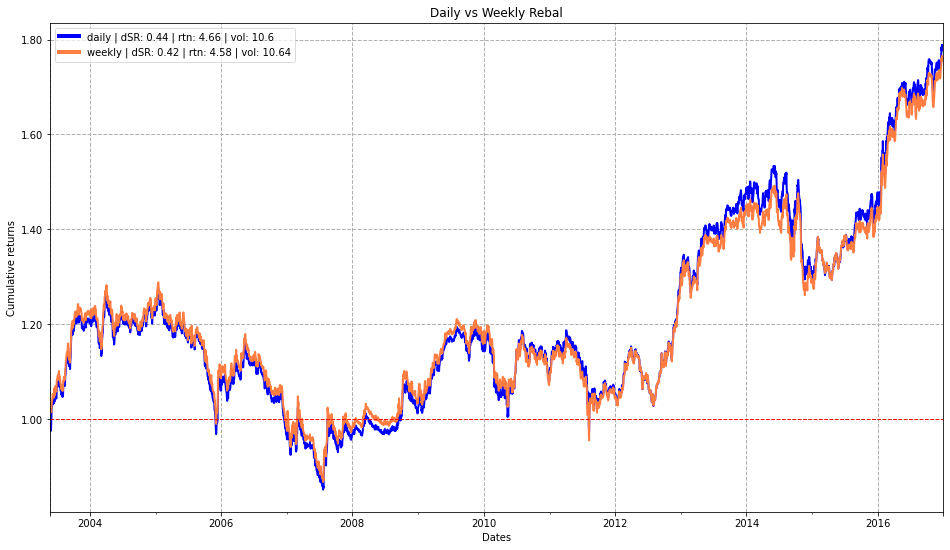

In [15]:
gen_plot_rtn(pd.concat([daily_bt.model_rtn.rename("daily"), weekly_bt.model_rtn.rename("weekly")], axis=1), main = "Daily vs Weekly Rebal")

In [16]:
# pickle.dump(daily_bt, open("../BT/value_sgneer_g10_daily.p", "wb"))
# daily_bt = pickle.load(open("../BT/value_sgneer_g10_daily.p", "rb"))

# pickle.dump(weekly_bt, open("../BT/value_sgneer_g10_weekly.p", "wb"))
# weekly_bt = pickle.load(open("../BT/value_sgneer_g10_weekly.p", "rb"))

# Regime Plot

# Sensitivity Analysis

In [17]:
# pf.plot_monthly_returns_dist(bt_obj.model_rtn)